In [22]:
import sympy as smp
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation

smp.init_printing()

# Enable interactive plot
%matplotlib notebook

plt.style.use('dark_background')

In [23]:
# PÉNDULOS UNIDOS POR RESORTES
# input_r = ['l*cos(phi1) * xhat + l*sin(phi1) * yhat', 'l*cos(phi2) * xhat + l*sin(phi2) * yhat']
# input_V = '-g*l*(m1*cos(phi1) + m2*cos(phi2)) + 1/2*5*(l*((cos(phi2)-cos(phi1))**2 + (sin(phi2) - sin(phi1))**2))'
# parameters = ['l', 'g']

# initial_conditions = [np.pi, -np.pi/4, 0, 0]
# m_values = [1, 2]
# p_values = [1, 10]

In [24]:
#PÉNDULO DOBLE
input_r = ['l*cos(phi1) * xhat + l*sin(phi1) * yhat', 'l*(cos(phi1) + cos(phi2)) * xhat + l*(sin(phi1) + sin(phi2)) * yhat']
input_V = '-2*m1*g*l*cos(phi1) - m2*g*l*cos(phi2)'
parameters = ['l', 'g']

initial_conditions = [np.pi, -np.pi/4, 0, 0]
m_values = [1, 2]
p_values = [1, 10]

In [25]:
# PÉNDULO TRIPLE
# input_r = ['l1*cos(phi1) * xhat + l1*sin(phi1) * yhat', '(l1*cos(phi1) + l2*cos(phi2)) * xhat + (l1*sin(phi1) + l2*sin(phi2)) * yhat', '(l1*cos(phi1) + l2*cos(phi2) + l3*cos(phi3)) * xhat + (l1*sin(phi1) + l2*sin(phi2) + l3*sin(phi3)) * yhat']
# #input_V = '-3*m1*g*l*cos(phi1) - 2*m2*g*l*cos(phi2) - m3*g*l*cos(phi3)'
# input_V = '-m1*g*l1*cos(phi1) - m2*g*(l1*cos(phi1) + l2*cos(phi2)) - m3*g*(l1*cos(phi1) + l2*cos(phi2) + l3*cos(phi3))'
# parameters = ['l1', 'l2', 'l3', 'g']

# initial_conditions = [np.pi, -np.pi/4, np.pi/4, 0, 0, 0]
# m_values = [1, 2, 1.5]
# p_values = [1, 1, 1, 10]

In [26]:
# # PÉNDULO CUÁDRUPLE
# input_r = ['L*cos(phi1) * xhat + L*sin(phi1) * yhat', '(L*cos(phi1) + L*cos(phi2)) * xhat + (L*sin(phi1) + L*sin(phi2)) * yhat', '(L*cos(phi1) + L*cos(phi2) + L*cos(phi3)) * xhat + (L*sin(phi1) + L*sin(phi2) + L*sin(phi3)) * yhat', '(L*cos(phi1) + L*cos(phi2) + L*cos(phi3) + L*cos(phi4)) * xhat + (L*sin(phi1) + L*sin(phi2) + L*sin(phi3) + L*sin(phi4)) * yhat']
# input_V = '-m*g*L*cos(phi1) - m*g*(L*cos(phi1) + L*cos(phi2)) - m*g*(L*cos(phi1) + L*cos(phi2) + L*cos(phi3)) - m*g*(L*cos(phi1) + L*cos(phi2) + L*cos(phi3) + L*cos(phi4))'
# parameters = ['L', 'g']

# initial_conditions = [np.pi, -np.pi/4, np.pi/4, 0, 0, 0, 0, 0]
# m_values = [1]
# p_values = [1, 10]

In [27]:
# PÉNDULO CON RESORTES
# input_r = ['r*cos(phi) * xhat + r*sin(phi) * yhat']
# input_V = '-m1*g*r*cos(phi) + 1/2 * k * (r-l0) ** 2'
# parameters = ['g', 'k', 'l0']

# initial_conditions = [1, np.pi/2, 0, 0]
# m_values = [1]
# p_values = [10, 10, 0.5]

In [28]:
# input_r = ['l*cos(phi1) * xhat + l*sin(phi1) * yhat', 'r*cos(phi2) * xhat + r*sin(phi2) * yhat']
# input_V = '-m1*g*l*cos(phi1) - G*m1*m2 / sqrt((l*cos(phi1) - r*cos(phi2) + 0.3)**2 + (l*sin(phi1) - r*sin(phi2) + 0.3)**2)'
# parameters = ['g', 'l', 'G']

# initial_conditions = [1, np.pi/2, 1, 0, 0, 0]
# m_values = [1, 1]
# p_values = [10, 1, 0.1]

In [29]:
# PÉNDULO CON GRAVEDAD NEWTONIANA
# input_r = ['(x + l*cos(phi)) * xhat + l*sin(phi) * yhat']
# input_V = '-G*m1/(L - l*cos(phi))'
# parameters = ['G', 'l', 'L']

# initial_conditions = [np.pi/2, 0, 0, 0]
# m_values = [1]
# p_values = [1, 1, 1.1]

In [30]:
# DOS CUERPOS
# input_r = ['r1*cos(phi1) * xhat + r1*sin(phi1) * yhat', 'r2*cos(phi2) * xhat + r2*sin(phi2) * yhat']
# input_V = '- G*m1*m2 / sqrt((r1*cos(phi1) - r1*cos(phi2) + e)**2 + (r1*sin(phi1) - r2*sin(phi2) + e)**2)'
# parameters = ['G', 'e']

# initial_conditions = [1, np.pi/2, 1, 0, 0, 0, 0, 0]
# m_values = [1, 1]
# p_values = [1, 0.1]

In [31]:
# SWINGING PENDULO DOBLE
# input_r = ['x * xhat + 0 * yhat', '(x + l1*cos(phi1)) * xhat + l1*sin(phi1) * yhat', '(x + l1*cos(phi1) + l2*cos(phi2)) * xhat + (l1*sin(phi1) + l2*sin(phi2)) * yhat']
# input_V = '-2*m1*g*l1*cos(phi1) - m2*g*l2*cos(phi2)'
# parameters = ['l1', 'l2', 'g']

# initial_conditions = [0, np.pi, -np.pi/4, 0, 0, 0]
# m_values = [1, 2, 1]
# p_values = [1, 10, 1]

In [32]:
# PÉNDULO SIMPLE
# input_r = ['(l*cos(phi)) * xhat + l*sin(phi) * yhat']
# input_V = '-m1*g*l*cos(phi)'
# parameters = ['l', 'g']

# initial_conditions = [np.pi, 0]
# m_values = [1]
# p_values = [1, 10]

In [33]:
fps = 50
t_final = 60
frames_number = fps*t_final
t_values = np.linspace(0, t_final, frames_number)

In [34]:
t = smp.symbols('t', real=True, positive=True)
r = []

q = []
q_to_coordinates = {}
n = 0
for input_ri in input_r:
    # Get the symbols
    eq = smp.S(input_ri, evaluate=False)
    symbols = eq.free_symbols

    for symbol in symbols:
        if str(symbol) not in parameters and str(symbol) not in q_to_coordinates and str(symbol) not in ('xhat', 'yhat'):
            q.append(smp.Function(str(symbol))(t))
            q_to_coordinates[str(symbol)] = q[n]
            n+=1
        
    
    r_i = smp.parse_expr(input_ri, q_to_coordinates)

    # Cartesian coordinates
    if smp.diff(r_i, 'rhat') == 0 and smp.diff(r_i, 'phihat') == 0:
        rx = smp.diff(r_i, 'xhat')
        ry = smp.diff(r_i, 'yhat')
        r.append([smp.Matrix([rx, ry])][0])

V = smp.parse_expr(input_V, q_to_coordinates)
        

r, V

⎛⎡⎡l⋅cos(φ₁(t))⎤  ⎡l⋅(cos(φ₁(t)) + cos(φ₂(t)))⎤⎤                              
⎜⎢⎢            ⎥, ⎢                           ⎥⎥, -2⋅g⋅l⋅m₁⋅cos(φ₁(t)) - g⋅l⋅m
⎝⎣⎣l⋅sin(φ₁(t))⎦  ⎣l⋅(sin(φ₁(t)) + sin(φ₂(t)))⎦⎦                              

            ⎞
₂⋅cos(φ₂(t))⎟
            ⎠

In [35]:
N = len(r) # número de partículas
m = smp.symbols(['m%d' % (i + 1) for i in range(N)], real=True, positive=True)
p = smp.symbols(tuple(parameters), real=True)

q_d = []
q_dd = []
for u in range(n):
    q_d.append(smp.diff(q[u],t))
    q_dd.append(smp.diff(q_d[u],t))


In [36]:
# Calculo la energía cinética 

T = 0
for u in range(n):
    for v in range(n):
        for i in range(N):
            T += m[i]*r[i].diff(q[u]).dot(r[i].diff(q[v])) * q_d[u] * q_d[v]
            
T = smp.Rational(1,2)*T

L = T-V

print('El lagrangiano:')
L.simplify()

El lagrangiano:


Las ecuaciones de euler lagrange:


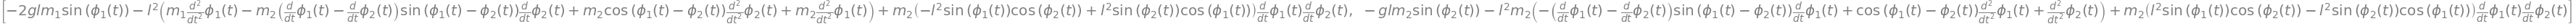

In [37]:
E_L = [smp.diff(L, q[u]) - smp.diff(smp.diff(L, q_d[u]), t).simplify() for u in range(n)]

print('Las ecuaciones de euler lagrange:')
E_L

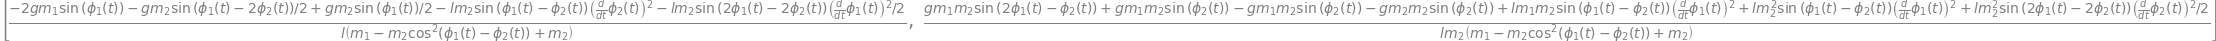

In [49]:
#sols = smp.linsolve(E_L, tuple(q_dd))
#sols

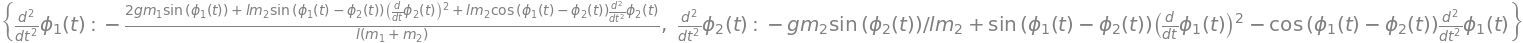

In [39]:
sols = {}
for acceleration, equation in zip(q_dd, E_L):
    c = smp.diff(equation, acceleration)
    solution = (acceleration - equation/c).simplify()
    sols[acceleration] = solution

sols

In [40]:
dvdt_f = [smp.lambdify((t,p,m,q,q_d), sols[q_dd[u]]) for u in range(n)]
drdt_f = [smp.lambdify((t,p,m,q,q_d), q_d[u]) for u in range(n)]

dSdt_f = drdt_f + dvdt_f
def dSdt(S, t, p, m):
    return [dSdt_f[u](t,p,m,S[:n],S[n:]) for u in range(2*n)]

In [41]:
ans = odeint(dSdt, y0=initial_conditions, t=t_values, args=(p_values,m_values))
q_f = ans.T[:n]

NameError: name 'Derivative' is not defined

In [ ]:
r_f = smp.lambdify((t,p,q), r)

x = []
y = []
pos = r_f(t_values,p_values,q_f)
for r_i in pos:
    x_i = r_i[0]
    y_i = r_i[1]
   
    x.append(x_i)
    y.append(y_i)


In [ ]:
fig, ax = plt.subplots(dpi=1920/16)
line, = plt.plot([], [], "o", markersize=5)

scale = 5
ax.set_xlim(-scale, scale)
ax.set_ylim(-scale, scale)

textEquations = ''
diferentialNames = ''
for u in range(N):
    #diferentialName = r'$' + str(smp.latex(q_dd[u])) + '$ = ' + '\n'
    #diferentialNames += diferentialName
    textEquation = r'$' + str(smp.latex(sols[q_dd[u]])) + '$ '
    textEquation += '\n'
    textEquations += textEquation

plt.text(-scale, scale, diferentialNames)
#line.set_label(r'$' + str(smp.latex(sols[q_dd[0]])) + '$')
time_text = ax.text(-scale, scale-4, '', fontsize=15)
time_text.set_text(textEquations)
#plt.text(-5, 5, r'$' + str(smp.latex(q_dd[0])) + ' = ' + str(smp.latex(sols[q_dd[0]])) + '$',wrap=True)

def animate(frame):
    line.set_data(([0] + [y[i][0][frame] for i in range(N)], [0] + [-x[i][0][frame] for i in range(N)]))
    time_text.set_position((-scale - frame/4, scale-4))
    return line

anim = FuncAnimation(fig, animate, frames=frames_number, interval=20)
plt.axis('off')
plt.show()


In [ ]:
FFwriter = animation.FFMpegWriter(fps=fps)
anim.save('GravityPendulum.mp4',writer=FFwriter)